# **Projet Python 2A: D’où viennent nos athlètes ?**

### *Jules Chapon - Antoine Claisse - Côme Pollet*

## **Introduction:**

La France compte plus de 320 000 équipements sportifs de proximité (gymnase, bassins aquatiques, terrains de sport, city stades…) soit en moyenne 47 équipements pour 10 000 habitants (hors sports de nature et pistes cyclables) selon une étude de 2020 menée par l’Union Sport & Cycle. Dans un contexte de multiplication des infrastructures sportives en vue de la construction d’infrastructures adaptées aux exigences des disciplines sportives (surtout à haut niveau), les attentes d’une modernisation des équipements sportifs dans les communes sont toujours plus fortes (65% des pratiquants expriment le souhait d’avoir davantage d’équipements sportifs, selon la même étude citée précédemment). A travers ce projet Python, nous allons donc tenter d’identifier des caractéristiques corrélatives reliant infrastructures sportives et pratique sportive de haut niveau.

Il s’agit dès lors de répondre à la problématique suivante: **Dans quelle mesure la répartition des infrastructures sportives sur le territoire français impacte-t-elle la pratique du sport de haut niveau à l’échelle départementale ?**

Dans un  souci de clarté et de respect des consignes, nous avons fait le choix de décliner notre réflexion en trois parties organisées de la façon suivante: dans un premier temps, l’approche consistera à sélectionner et à nettoyer les données pour être en mesure par la suite de construire des statistiques descriptives sur la répartition des équipements sportives par ville. Dans un second temps, le but sera de mesurer les déséquilibres territoriaux de la répartition des infrastructures sportives grâce à des supports cartographiques permettant une data visualisation. Enfin, nous avons décidé de clôturer notre projet sur une touche plus personnelle dans une troisième partie qui combine modélisation et analyse descriptive sur les possibles performances des athlètes lors des Jeux Olympiques de Paris en 2024.

### **Import des bibliothèques et packages nécessaires au traitement et à la visualisation des données**

Avant de commencer quoi que ce soit, il est primordial d'importer les différents "packages" qui nous seront utiles tout au long de notre étude.

Pour manipuler les données :

In [1]:
import pandas as pd # Permet d'utiliser le package Pandas
import numpy as np # Permet d'utiliser le package Numpy

Pour réaliser des graphiques et des diagrammes :

In [2]:
# Pour faire un diagramme en bâtons
import plotly
import plotly.express as px
from IPython.display import HTML

#Pour faire une régression linéaire
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

Pour faire du *Webscrapping* :

In [ ]:
import urllib
import bs4
from urllib import request
!pip install html5lib
!pip install lxml

Pour réaliser des cartes :

In [ ]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install geoplot

import geopandas as gpd
import contextily as ctx
import folium
import math

### **Sélection de la base de données principale**

Dans cette première partie, l’accent est mis sur la sélection ainsi que le nettoyage des données. Ainsi, le but est ici d’exploiter et d’organiser les différentes données récoltées sur *data.gouv*, la plateforme officielle de diffusion de données publiques de l'État français. Par ailleurs, l’ajout de rapides statistiques descriptives permet de vérifier la pertinence ainsi que l’exhaustivité des données qui vont être utilisées pour la suite du projet.

Commençons par importer notre base de données principale, celle contenant les différents équipements sportifs en France.
Nous en obtenons un rapide aperçu qui apparaît ci-dessous.
Nous appelons cette base de données **equipements**.

In [132]:
equipements = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/equipments.csv", sep=';', encoding='latin-1', low_memory=False)
equipements.head()

,DepCode,DepLib,ComInsee,ComLib,InsNumeroInstall,InsNom,EquipementId,EquNom,EquipementTypeCode,EquipementTypeLib,...,EquUtilClub,EquUtilAutre,EquUtilIndividuel,EquUtilPerformance,EquUtilFormation,EquUtilRecreation,EquDateDernierTravauxReal,EquDateDernierTravauxAucun,EquGPSX,EquGPSY
0,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E001I010010003,SALLE POLYVALENTE,2201,Salles polyvalentes / des fêtes / non spéciali...,...,1,1,1,0,0,1,NaN,1.0,"4,9206","46,1531"
1,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E002I010010003,BOULODROME COUVERT 8 JEUX,201,Terrain de boules,...,1,0,0,0,0,1,NaN,1.0,"4,9206","46,1531"
2,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E003I010010003,BOULODROME EXTERIEUR,201,Terrain de boules,...,1,0,1,0,0,1,NaN,1.0,"4,9206","46,1531"
3,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E001I010010004,Terrain de Foot de Proximité,2802,Terrain de football,...,0,0,1,0,0,1,NaN,1.0,"4,9247","46,1511"
4,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E002I010010004,AGORESPACE,1701,Plateau EPS/Multisports/city-stades,...,0,0,1,0,0,1,NaN,1.0,"4,9242","46,1508"


Désormais, l'idée est de déceler les informations utiles à l'objectif de notre projet. Pour cela, nous avons décider de faire apparaître quelques statistiques descriptives concernant la répartition et le nombre d'infrastructures sportives en France.

In [133]:
equipements.count()

DepCode                            318037
DepLib                             318037
ComInsee                           318037
ComLib                             318037
InsNumeroInstall                   318037
InsNom                             315472
EquipementId                       318037
EquNom                             318037
EquipementTypeCode                 318037
EquipementTypeLib                  318037
EquipementFamille                  318037
EquipementCateg                    318037
GestionTypeProprietairePrincLib    314826
GestionTypeGestionnairePrincLib    313934
GestionTypeProprietaireSecLib       53021
GestionTypeGestionnaireSecLib       26242
EquAnneeService                    202275
NatureSolLib                       313302
NatureLibelle                      314948
EquUtilScolaire                    318037
EquUtilClub                        318037
EquUtilAutre                       318037
EquUtilIndividuel                  318037
EquUtilPerformance                

In [134]:
equipements.nunique()

DepCode                               107
DepLib                                107
ComInsee                            28458
ComLib                              26784
InsNumeroInstall                   139953
InsNom                              78767
EquipementId                       318037
EquNom                             114650
EquipementTypeCode                    163
EquipementTypeLib                     163
EquipementFamille                      30
EquipementCateg                         7
GestionTypeProprietairePrincLib        12
GestionTypeGestionnairePrincLib        12
GestionTypeProprietaireSecLib          12
GestionTypeGestionnaireSecLib          12
EquAnneeService                       203
NatureSolLib                           16
NatureLibelle                           7
EquUtilScolaire                         2
EquUtilClub                             2
EquUtilAutre                            2
EquUtilIndividuel                       2
EquUtilPerformance                

Nous pouvons donc voir que la base de données semble exhaustive, surtout pour les données qui nous intéressent vraiment (comme les données géographiques, les années de mise en service, le type d'infrastructure sportive...).
Nous pouvons donc commencer à manipuler et à analyser ces données.

### **Répartition des équipements sportifs en fonction du sport**

Dans un premier temps, nous allons étudier les équipements en fonction de leur catégorie : nous allons regrouper les équipements par sport, et voir si certaines tendances semblent se dégager, et s'il existe un équilibre entre la demande et l'offre sportive en France.

Pour cela, nous créons un nouveau DataFrame appelé **df1** dans lequel nous regroupons les équipements sportifs par catégorie, et que nous classons par ordre décroissant. Cela nous permet donc de voir les 10 sports ayant le plus d'équipements sportifs en France.

In [135]:
## Classement 1 : Les 10 sports avec le plus d'équipements sportifs en France
df1 = equipements.groupby('EquipementTypeLib')['EquipementId'].count()
df1=df1.reset_index()
df1=df1.rename(columns={'EquipementTypeLib':'Type','EquipementId':'Nombre'})
df1.sort_values('Nombre', ascending=False).head(10)

,Type,Nombre
29,Court de tennis,40146
139,Terrain de football,37993
17,Boucle de randonnée,24966
71,Plateau EPS/Multisports/city-stades,23531
149,Terrain de pétanque,21093
99,Salle multisports (gymnase),18408
104,Salles polyvalentes / des fêtes / non spéciali...,15733
133,Terrain de basket-ball,8811
21,Carrière,7682
92,Salle de musculation/cardiotraining,7293


Afin de rendre cela plus visible, nous réalisons un diagramme en bâtons représentant les 10 sports ayant le plus d'équipements sportifs en France.

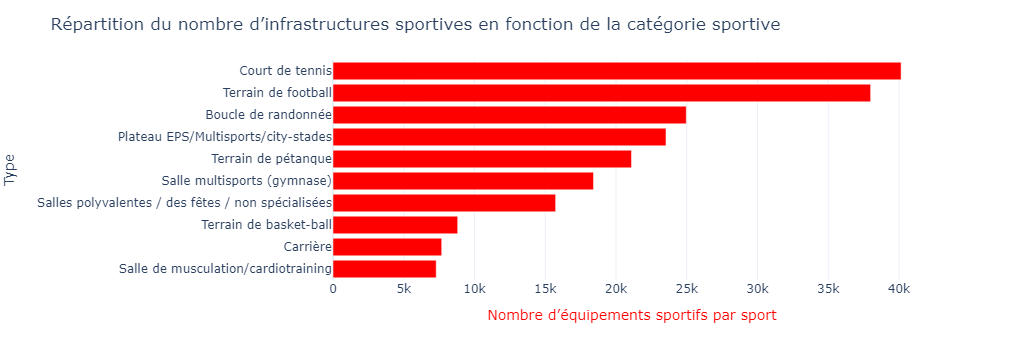

In [136]:
fig = px.bar(df1.sort_values('Nombre', ascending=False).head(10).sort_values('Nombre', ascending=True), orientation='h', x='Nombre',
             y='Type', color_discrete_sequence=["red"], template="plotly_white")

fig.update_layout(
    title='Répartition du nombre d’infrastructures sportives en fonction de la catégorie sportive',
    xaxis_title='Nombre d’équipements sportifs par sport')
fig.update_xaxes(title_font=dict(color='red'))

Sans grande surprise, nous pouvons noter que les courts de tennis, les terrains de football et les salles multisports sont très nombreux en France. Notons également que les 10 sports apparaissant sur le diagramme en bâton ci-dessus font parties des 10 sports les plus pratiqués en France, venant par conséquent témoigner de la fiabilité des données récoltées pour notre projet.

Néanmoins, il est désormais important de voir si cette offre sportive coïncide en effet avec la demande, c'est-à-dire au nombre de licenciés. Pour cela, nous importons une nouvelle base de données contenant le nombre de licences en France en fonction de plusieurs critères comme l'âge, le sexe ou le sport. Nous appelons ce DataFrame **licences**. En voici un rapide aperçu :

In [137]:
licences = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/Licences.csv", sep=';', encoding='latin-1', low_memory=False)
licences.head()

,code_commune,libelle,region,fed_2019,nom_fed,l_2019,l_0_4_2019,l_5_9_2019,l_10_14_2019,l_15_19_2019,...,poph_2018,poph_0_4_2018,poph_5_9_2018,poph_10_14_2018,poph_15_19_2018,poph_20_29_2018,poph_30_44_2018,poph_45_59_2018,poph_60_74_2018,poph_75_2018
0,01001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,101,FF d'athlétisme,8,0,0,4,2,...,388.0,15,30,20,29,25,70,122,51,26
1,01001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,103,FF de badminton,11,0,0,4,1,...,388.0,15,30,20,29,25,70,122,51,26
2,01001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,105,FF de basketball,1,0,0,0,0,...,388.0,15,30,20,29,25,70,122,51,26
3,01001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,108,FF de cyclisme,2,0,1,1,0,...,388.0,15,30,20,29,25,70,122,51,26
4,01001,Abergement-Clémenciat,Auvergne-Rhône-Alpes,109,FF d'équitation,10,0,0,2,2,...,388.0,15,30,20,29,25,70,122,51,26


Observons ci-dessous désormais le top 10 des sports les plus populaires en France selon le nombre de licenciés cette fois-ci.

Comme précédemment, nous créons un nouveau DataFrame appelé **df2** dans lequel nous regroupons le nombre de licenciés pour chaque fédération sportive, que nous classons par ordre décroissant. Cela nous permet donc de voir les 10 sports ayant le plus de licenciés en France.

In [138]:
## Classement 2 : Les 10 sports avec le plus de licenciés en France
df2 = licences.groupby('nom_fed')['l_2019'].sum()
df2=df2.reset_index()
df2=df2.rename(columns={'nom_fed':'Fédérations','l_2019':'Licenciés'})
df2.sort_values('Licenciés', ascending=False).head(10)

,Fédérations,Licenciés
27,FF de football,2188615
96,Union nationale du sport scolaire (UNSS),1173049
67,FF de tennis,971042
98,Union sportive de l'enseignement du premier degré,716302
13,FF d'équitation,609701
38,FF de judo-jujitsu et disciplines associées,522510
18,FF de basketball,513467
32,FF de handball,488799
12,FF d'éducation physique et de gymnastique volo...,481979
30,FF de golf,411976


Encore une fois sans surprise, on observe que le classement des sports par nombre d'infrastructures comporte de nombreuses similitudes avec le classement des sports par nombre de licenciés (avec des sports communs comme le football, l'équitation, le tennis, le handball ou encore le basketball).

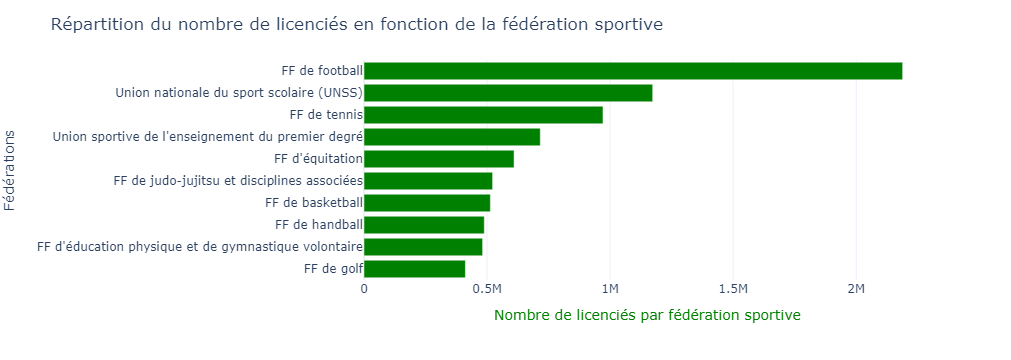

In [139]:
fig = px.bar(df2.sort_values('Licenciés', ascending=False).head(10).sort_values('Licenciés', ascending=True), orientation='h', x='Licenciés',
             y='Fédérations', color_discrete_sequence=["green"], template="plotly_white")

fig.update_layout(
    title='Répartition du nombre de licenciés en fonction de la fédération sportive',
    xaxis_title='Nombre de licenciés par fédération sportive')
fig.update_xaxes(title_font=dict(color='green'))

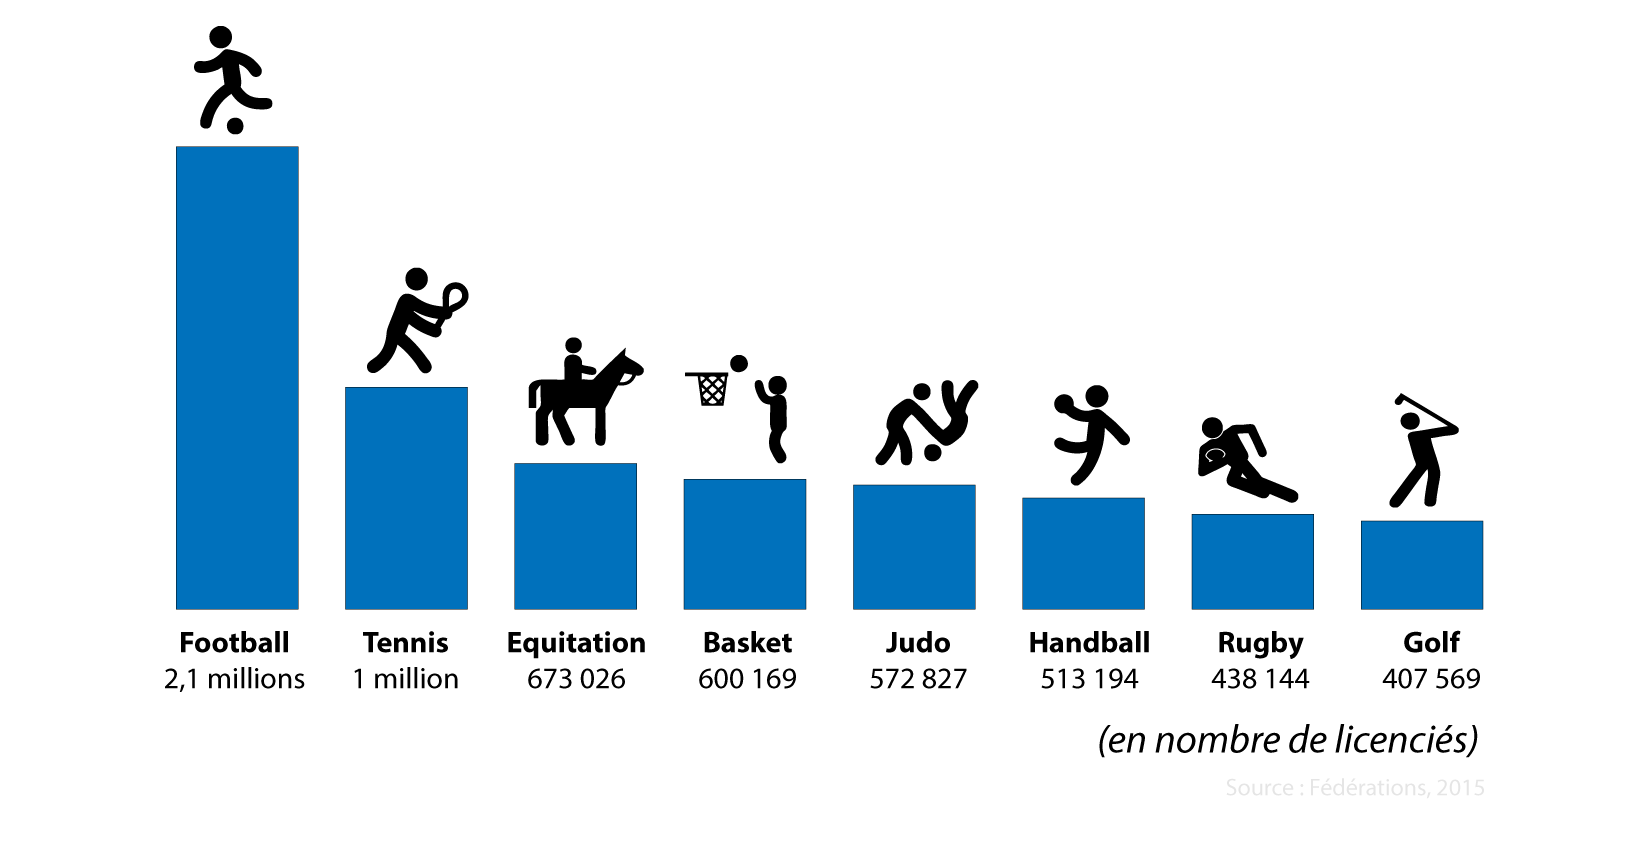

Ce dernier diagramme en bâtons interactif montre la répartition des licenciés français selon chaque fédération sportive. Ainsi, nous pouvons aisément remarquer que les 10 sports les plus populaires sont presque en totalité les mêmes que ceux correspondant aux précédent classement par nombre d'infrastructures sportives (voir diagramme en bâtons rouges). Autre fait non surprenant, ce classement par nombre de licenciés correspond au classsement officielle de la fédération de sport en France (voir image ci-dessus).

### **Répartition géographique des équipements sportifs**

Désormais, nous allons modifier cette base de données afin de regrouper le nombre d'équipements sportifs par département. Pour cela, nous créons un nouveau DataFrame que nous appelons **equipements_departements**. Nous enlevons aussi la plupart des colonnes qui ne nous servent, dans un premier temps, à rien.
Afin de faciliter nos futurs graphiques, nous nous intéressons ici seulement au départements de France métropolitaine.

In [142]:
equipements_departements = pd.DataFrame(equipements.groupby('DepCode')['EquipementId'].count()).head(96)
equipements_departements = equipements_departements.rename({"EquipementId":"NbreEquipements"}, axis=1)
equipements_departements.head()

,NbreEquipements
DepCode,
01,3781
02,3442
03,2514
04,1649
05,3075


Nous pouvons désormais nous intéresser davantage aux statistiques descriptives du DataFrame **equipements_departements**.

In [143]:
equipements_departements.describe()

,NbreEquipements
count,96.000000
mean,3223.666667
std,1553.506259
min,512.000000
25%,2036.000000
50%,2918.500000
75%,3939.500000
max,8534.000000


Ainsi, on peut voir que la répartition des équipements sportifs en France est relativement hétérogène, même si une  majorité des départements semblent se situer entre 2000 et 4000 équipements sportifs.
Néanmoins, cela paraît clairement logique, au vu des situations très différentes entre les départements, que ce soit au niveau de leur population ou de l'espace disponible.

Dès lors, nous décidons d'ajouter 2 variables explicatives à la répartition des équipements sprotifs en France : la population et la superficie par département.

Dans un premier temps, nous ajountons la population par département.
Pour cela, nous importons une nouvelle base de données, disponible cette fois sur le site de l'INSEE.
Nous pouvons obtenir un aperçu de la base de donnée susmentionnée, que nous nommons **population**.

In [144]:
population = pd.read_csv("https://minio.lab.sspcloud.fr/juleschpn/Population2019.CSV", sep=';', low_memory=False)
population.head()

,CODGEO,P19_POP,P13_POP,P08_POP,D99_POP,D90_POP,D82_POP,D75_POP,D68_POP,SUPERF,...,D75_LOGVAC,D68_LOGVAC,P19_PMEN,P13_PMEN,P08_PMEN,D99_PMEN,D90_NPER_RP,D82_NPER_RP,D75_NPER_RP,D68_NPER_RP
0,01001,779,767,791,728,579,477,368,347,15.95,...,22.0,25.0,779.000000,767.000000,791.000000,728,579,477.0,368.0,347.0
1,01002,256,236,194,168,159,136,106,88,9.15,...,23.0,1.0,256.000000,236.000000,194.000000,168,159,136.0,106.0,88.0
2,01004,14134,14359,12792,11436,10455,9737,9550,8949,24.60,...,246.0,155.0,13625.012669,13831.019385,12305.616156,11015,10092,9333.0,9164.0,8582.0
3,01005,1751,1635,1567,1408,1156,848,756,627,15.92,...,16.0,15.0,1751.000000,1635.000000,1567.000000,1406,1155,848.0,753.0,627.0
4,01006,112,108,123,86,76,65,82,108,5.88,...,13.0,8.0,112.000000,108.000000,123.000000,86,76,65.0,82.0,108.0


Là encore, nous décidons de retravailler notre base de données. Pour cela, nous nous séparons des colonnes inutiles pour ne garder que la population par ville en 2019 avant de les regrouper par département.
Nous obtenons ainsi le DataFrame **population_departements** dont un aperçu est disponible ci-dessous.

In [145]:
population['DepCode'] = population['CODGEO'].str[:2]

population_departements = pd.DataFrame(population.groupby('DepCode')['P19_POP'].sum()).head(96)
population_departements = population_departements.rename({"P19_POP":"Population"}, axis=1)
population_departements.head()                                                        

,Population
DepCode,
01,652432
02,531345
03,335975
04,164308
05,141220


Afin de faciliter nos futures manipulations, nous commençons par concaténer nos DataFrames en un seul, que nous nommons *data_base*.

In [146]:
data_base = pd.concat([equipements_departements,population_departements], axis=1)
data_base.head()

,NbreEquipements,Population
DepCode,,
01,3781,652432
02,3442,531345
03,2514,335975
04,1649,164308
05,3075,141220


Désormais, nous importons donc une base de données contenant la superficie de chaque département.
N'ayant pas trouvé une telle base de données sur le site de l'INSEE, nous décidons donc de faire du "Webscrapping" sur la page Wikipédia traitant de la superficie des départements français disponible à l'adresse suivante : https://fr.wikipedia.org/wiki/Superficie_des_d%C3%A9partements_fran%C3%A7ais

In [147]:
# Toute cette partie provient du cours de M. Galiana disponible sur "https://linogaliana-teaching.netlify.app/"

url_superficie = "https://fr.wikipedia.org/wiki/Superficie_des_d%C3%A9partements_fran%C3%A7ais"
    
request_text = request.urlopen(url_superficie).read()

page = bs4.BeautifulSoup(request_text, "html.parser") # Solution trouvée sur cette page "https://stackoverflow.com/questions/24398302/bs4-featurenotfound-couldnt-find-a-tree-builder-with-the-features-you-requeste"

tableau_superficie = page.find('table', {'class' : 'wikitable sortable'})

table_body = tableau_superficie.find('tbody')
rows = table_body.find_all('tr')

cols = rows[5].find_all('td')

for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    
dico_superficie = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_superficie[cols[0]] = cols[1:]
        
data_superficie = pd.DataFrame.from_dict(dico_superficie,orient='index')

Il ne nous reste qu'à renommer nos différentes colonnes, afin d'obtenir le base de données **data-superficie** suivante :

In [148]:
columns_departements = ['Département','Arrondissement_1950','Superf_1950','Superficie_1950','Arrondissement_2018','Superficie_INSEE','Superficie_IGN','Localisation']
data_superficie.columns = columns_departements
data_superficie.head()

,Département,Arrondissement_1950,Superf_1950,Superficie_1950,Arrondissement_2018,Superficie_INSEE,Superficie_IGN,Localisation
Total France métropolitaine,,,"551 695,42",,543 940,"550 232,88",,None
01,Ain,Belley,"1 311,66","5825,6",BelleyBourg-en-BresseGexNantua,5 762[Insee 1],"5 785,2[Brgm 1]",
Bourg-en-Bresse,"3 173,75",None,None,None,None,None,None,None
Gex,"412,58",None,None,None,None,None,None,None
Nantua,"927,61",None,None,None,None,None,None,None


Nous regroupons alors nos bases de données.

In [149]:
data_base = pd.concat([data_base,data_superficie], join='inner', axis=1)

Nous supprimons les colonnes inutiles.

In [150]:
data_base = data_base.drop(columns = ["Arrondissement_1950", "Superf_1950", "Superficie_1950", "Arrondissement_2018", "Superficie_IGN", "Localisation"])

Enfin, nous modifions la colonne "Superficie_INSEE" pour la passer au format *int*. Nous obtenons la base de données suivante :

In [151]:
data_base['Superficie_INSEE']=data_base['Superficie_INSEE'].apply(lambda x: x.split(sep="[")[0])
data_base['Superficie_INSEE']=data_base['Superficie_INSEE'].apply(lambda x: x.split(sep=None))
data_base['Superficie_INSEE']=data_base['Superficie_INSEE'].apply(lambda x: [6, 291] if len(x)==0 else x) # On rajoute juste la seule donnée manquante, qui était la superficie du Gers
data_base['Superficie_INSEE']=data_base['Superficie_INSEE'].apply(lambda x: int(x[0]) if len(x)==1 else 1000*int(x[0])+int(x[1]))
data_base.sample(5, replace=False)

,NbreEquipements,Population,Département,Superficie_INSEE
65,1724,229567,Hautes-Pyrénées,4464
84,2592,561469,Vaucluse,3567
31,6232,1400039,Haute-Garonne,6309
04,1649,164308,Alpes-de-Haute-Provence,6925
89,2042,335707,Yonne,7427


A partir de ces données, nous créons 2 nouvelles variables, à savoir le nombre d'équipements sportifs pour 1 000 habitants et le nombre d'équipements sportifs par km².

In [152]:
data_base["Equipements / 1000 Habitants"] = 1000*data_base["NbreEquipements"]/data_base["Population"]
data_base["Equipements / km²"] = data_base["NbreEquipements"]/data_base["Superficie_INSEE"]

Nous pouvons alors réordonner nos colonnes et réaliser de rapides statistiques descriptives.

In [153]:
data_base = data_base.reindex(columns = ["Département", "NbreEquipements", "Population", "Equipements / 1000 Habitants", "Superficie_INSEE", "Equipements / km²"])
data_base.head()

,Département,NbreEquipements,Population,Equipements / 1000 Habitants,Superficie_INSEE,Equipements / km²
01,Ain,3781,652432,5.795240,5762,0.656196
02,Aisne,3442,531345,6.477900,7362,0.467536
03,Allier,2514,335975,7.482700,7340,0.342507
04,Alpes-de-Haute-Provence,1649,164308,10.036030,6925,0.238123
05,Hautes-Alpes,3075,141220,21.774536,5549,0.554154


In [154]:
data_base.describe()

,NbreEquipements,Population,Equipements / 1000 Habitants,Superficie_INSEE,Equipements / km²
count,94.000000,9.400000e+01,94.000000,94.000000,94.000000
mean,3279.138298,7.267601e+05,6.138168,5694.638298,1.340058
std,1521.761632,6.625107e+05,2.858726,1933.390297,3.715091
min,837.000000,7.660400e+04,0.669846,105.000000,0.144345
25%,2079.000000,3.078570e+05,4.618389,5185.500000,0.350905
50%,2952.500000,5.477335e+05,5.923834,5964.500000,0.541771
75%,3956.500000,8.936722e+05,7.184485,6775.000000,0.775132
max,8534.000000,4.330846e+06,21.774536,9976.000000,27.628571


Le tableau ci-dessus permet de voir que sur un grand nombre d'observations d'équipements sportifs à l'échelle nationale (94 000 000), certaines zones semblent s'apparenter à de véritables déserts d'infrastructures sportives (environ 0.67 équipement pour 1000 habitants dans le cas minimal) là où d'autres zones géographiques font des équipements sportifs une priorité (avec 21.77 équipements pour 1000 habitants dans le cas maximal).

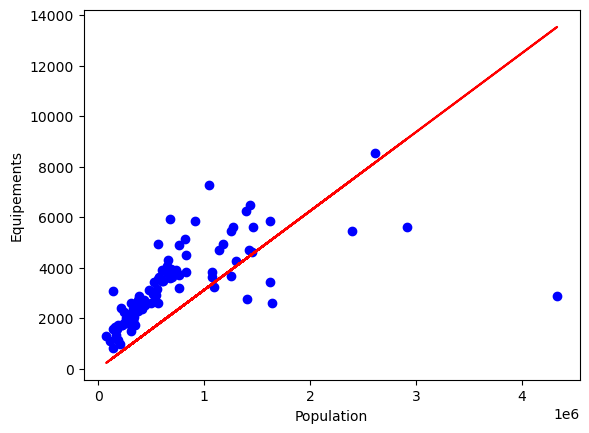

In [180]:
x = data_base[["Population"]]
y = data_base[["NbreEquipements"]]
model = LinearRegression(fit_intercept=False).fit(x,y) # Fit_intercept = False pour que la courbe passe par (0,0)

plt.scatter(x, y, color = 'blue')
plt.plot(x, model.predict(x), color = 'red')
plt.xlabel('Population')
plt.ylabel('Equipements')
plt.show()

In [178]:
x = sm.add_constant(x)
model = OLS(y,x)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NbreEquipements   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     58.83
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.74e-11
Time:                        10:58:38   Log-Likelihood:                -798.44
No. Observations:                  94   AIC:                             1601.
Df Residuals:                      92   BIC:                             1606.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2236.5692    183.481     12.190      0.000    1872.159    2600.979
Population     0.0014      0.000      7.670      0.000       0.001       0.002
==============================================================================
Omnibus:                       19.434   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.477
Skew:                          -0.410   Prob(JB):                     2.03e-18
Kurtosis:                       7.487   Cond. No.                     1.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Le graphique ci-dessus représente la régression linéaire du nombre d'équipements (en ordonnée) par la population (en abscisse). En effet, on voit bien que la ligne rouge, approche le plus possible tous les points du jeu de données. 

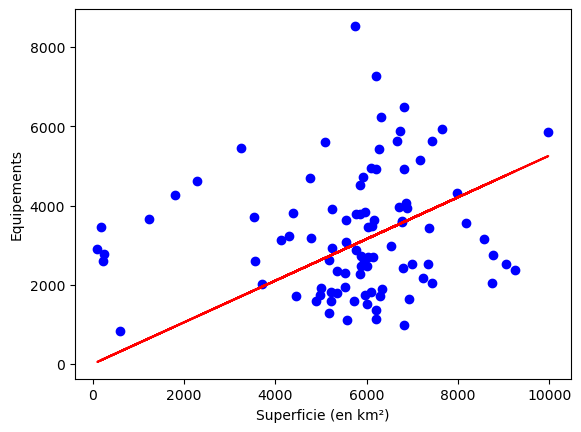

In [181]:
x = data_base[["Superficie_INSEE"]]
y = data_base[["NbreEquipements"]]
model = LinearRegression(fit_intercept=False).fit(x,y) # Fit_intercept = False pour que la courbe passe par (0,0)

plt.scatter(x, y, color = 'blue')
plt.plot(x, model.predict(x), color = 'red')
plt.xlabel('Superficie (en km²)')
plt.ylabel('Equipements')
plt.show()

In [182]:
x = sm.add_constant(x)
model = OLS(y,x)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NbreEquipements   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.258
Date:                Wed, 21 Dec 2022   Prob (F-statistic):              0.265
Time:                        10:59:43   Log-Likelihood:                -821.04
No. Observations:                  94   AIC:                             1646.
Df Residuals:                      92   BIC:                             1651.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2758.5516    489.892      5.631      0.000    1785.583    3731.520
Superficie_INSEE     0.0914      0.082      1.122      0.265      -0.070       0.253
==============================================================================
Omnibus:                       11.342   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.673
Skew:                           0.824   Prob(JB):                      0.00292
Kurtosis:                       3.513   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Une fois encore, le graphique ci-dessus représente la régression linéaire du nombre d'équipements (en ordonnée) par la superficie (en abscisse). Le nuage de points semble dès lors plus spacieux par rapport à la précédente régression linéaire, ce qui sous-entend une régression moins précise que la précédente et donc une valeur plus faible de son R<sup>2</sup>.

In [183]:
x = data_base.drop(['Département', 'NbreEquipements', 'Equipements / 1000 Habitants', 'Equipements / km²'], axis=1)
y = data_base[["NbreEquipements"]]
x = sm.add_constant(x)

model = OLS(y,x)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        NbreEquipements   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     50.71
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.60e-15
Time:                        10:59:48   Log-Likelihood:                -786.48
No. Observations:                  94   AIC:                             1579.
Df Residuals:                      91   BIC:                             1587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              211.3050    426.593      0.495      0.622    -636.070    1058.680
Population           0.0018      0.000      9.941      0.000       0.001       0.002
Superficie_INSEE     0.3130      0.061      5.134      0.000       0.192       0.434
==============================================================================
Omnibus:                       24.085   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.766
Skew:                          -0.641   Prob(JB):                     3.58e-22
Kurtosis:                       7.855   Cond. No.                     3.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Déséquilibres territoriaux: construction d'une carte interactive**

Dans cette partie, l’accent est mis sur la visualisation des données à l’échelle nationale, permettant ainsi de montrer concrètement la façon dont les infrastructures sportives sont réparties en France. Cela permet en effet de représenter les éventuels déséquilibres territoriaux de cette répartition contribuant ainsi à expliquer l’impact potentiel de la pratique du sport à haut niveau selon les départements.
La construction d'une carte interactive à l'échelle nationale permet une représentation fiable et intuitive des infrastructures sportives sur l'ensemble du territoire français.
Le but de cette partie est alors de trouver une éventuelle corrélation entre espoirs français et répartition des infrastructures.

In [82]:
# D'abord, nous trouvons le centre de la carte par la moyenne et supprimons les départements d'outre-mer.
eq_tests = equipements.copy()
eq_tests['NumDepCode'] = np.where((eq_tests['DepCode'].isin(['2A','2B'])) , 20, eq_tests['DepCode'])

eq_tests['NumDepCode'] = pd.to_numeric(eq_tests['NumDepCode'])
eq_tests[eq_tests['NumDepCode'] <= 95].count()

DepCode                            309472
DepLib                             309472
ComInsee                           309472
ComLib                             309472
InsNumeroInstall                   309472
InsNom                             306957
EquipementId                       309472
EquNom                             309472
EquipementTypeCode                 309472
EquipementTypeLib                  309472
EquipementFamille                  309472
EquipementCateg                    309472
GestionTypeProprietairePrincLib    306310
GestionTypeGestionnairePrincLib    305503
GestionTypeProprietaireSecLib       52307
GestionTypeGestionnaireSecLib       25806
EquAnneeService                    197909
NatureSolLib                       304836
NatureLibelle                      306499
EquUtilScolaire                    309472
EquUtilClub                        309472
EquUtilAutre                       309472
EquUtilIndividuel                  309472
EquUtilPerformance                

In [84]:
## Ici nous convertissons les colonnes longitudes et lattitudes qui sont des strings en numerics. 
eq_metro = eq_tests[eq_tests['NumDepCode'] <= 95]
center = pd.DataFrame({'lat' : eq_metro['EquGPSY'],'lon' : eq_metro['EquGPSX']})
center['lat'] = pd.to_numeric(center['lat'].str.replace(",", "."))
center['lon'] = pd.to_numeric(center['lon'].str.replace(",", "."))
center[center['lat'] > 51] #Notons l'imprévu suivant : les coordonées sont sensées être entrées en WGS84 mais des fautes de frappes/erreurs de format se sont glissées comme ici la ligne 16582 qui est omet les degrés (43, 6) et ne précise que les minutes d'arcs

,lat,lon
14470,6.302812e+06,1.005060e+06
16582,5.565000e+01,5.676667e+01
17220,5.403333e+01,6.750000e+00
42015,4.619175e+06,-3.462680e-01
42026,4.623731e+06,-3.543310e-01
...,...,...
186074,5.106517e+01,2.488470e+00
186075,5.105965e+01,2.493498e+00
217269,7.277506e+01,2.051651e+00
282682,5.668332e+01,5.677190e-01


In [87]:
#Ici nous supprimons les lignes "défectueuses" (points extrêmes :51° 05′ 21″ N,41° 19′ N, 5° 09′ 04″ O, 9° 33′ 36″ E)

mapable = center.loc[(center['lat'] < 52 ) & (center['lat'] > 41) & (center['lon'] > -5.15) & (center['lon'] < 9.55)]
eqnoms = mapable.join(eq_metro['EquNom'])

In [93]:
map_center = mapable.mean(0).values.tolist()
map_center

#Le résultat n'est pas si éloigné du centre calculé par l'IGN en 1993 qui fixe le centre à 46° 32′ 23″ N, 2° 25′ 49″ E.

[46.84860411092809, 2.481900111334595]

In [94]:
ne = mapable.min().values.tolist()
so = mapable.max().values.tolist()

print(ne, so)

[41.18527778, -5.10002] [51.07874, 9.54616]


In [95]:
# 2. Carte interactive
from pathlib import Path
Path("leaflet").mkdir(parents=True, exist_ok=True)
m = folium.Map(location = map_center, tiles='Stamen Toner')

# Ajout des markers 1 à 1 sur la carte
indices_list = mapable.sample(300).index.tolist() #Je n'en affiche que 300 pour des raisons de lisibilité
for i in indices_list:
    folium.Marker([mapable.loc[i]['lat'], mapable.loc[i]['lon']], popup=eqnoms.loc[i]['EquNom']).add_to(m)
m.fit_bounds([so, ne])
m

### **Partie III: Modélisation & Prédictions à l’horizon 2024**

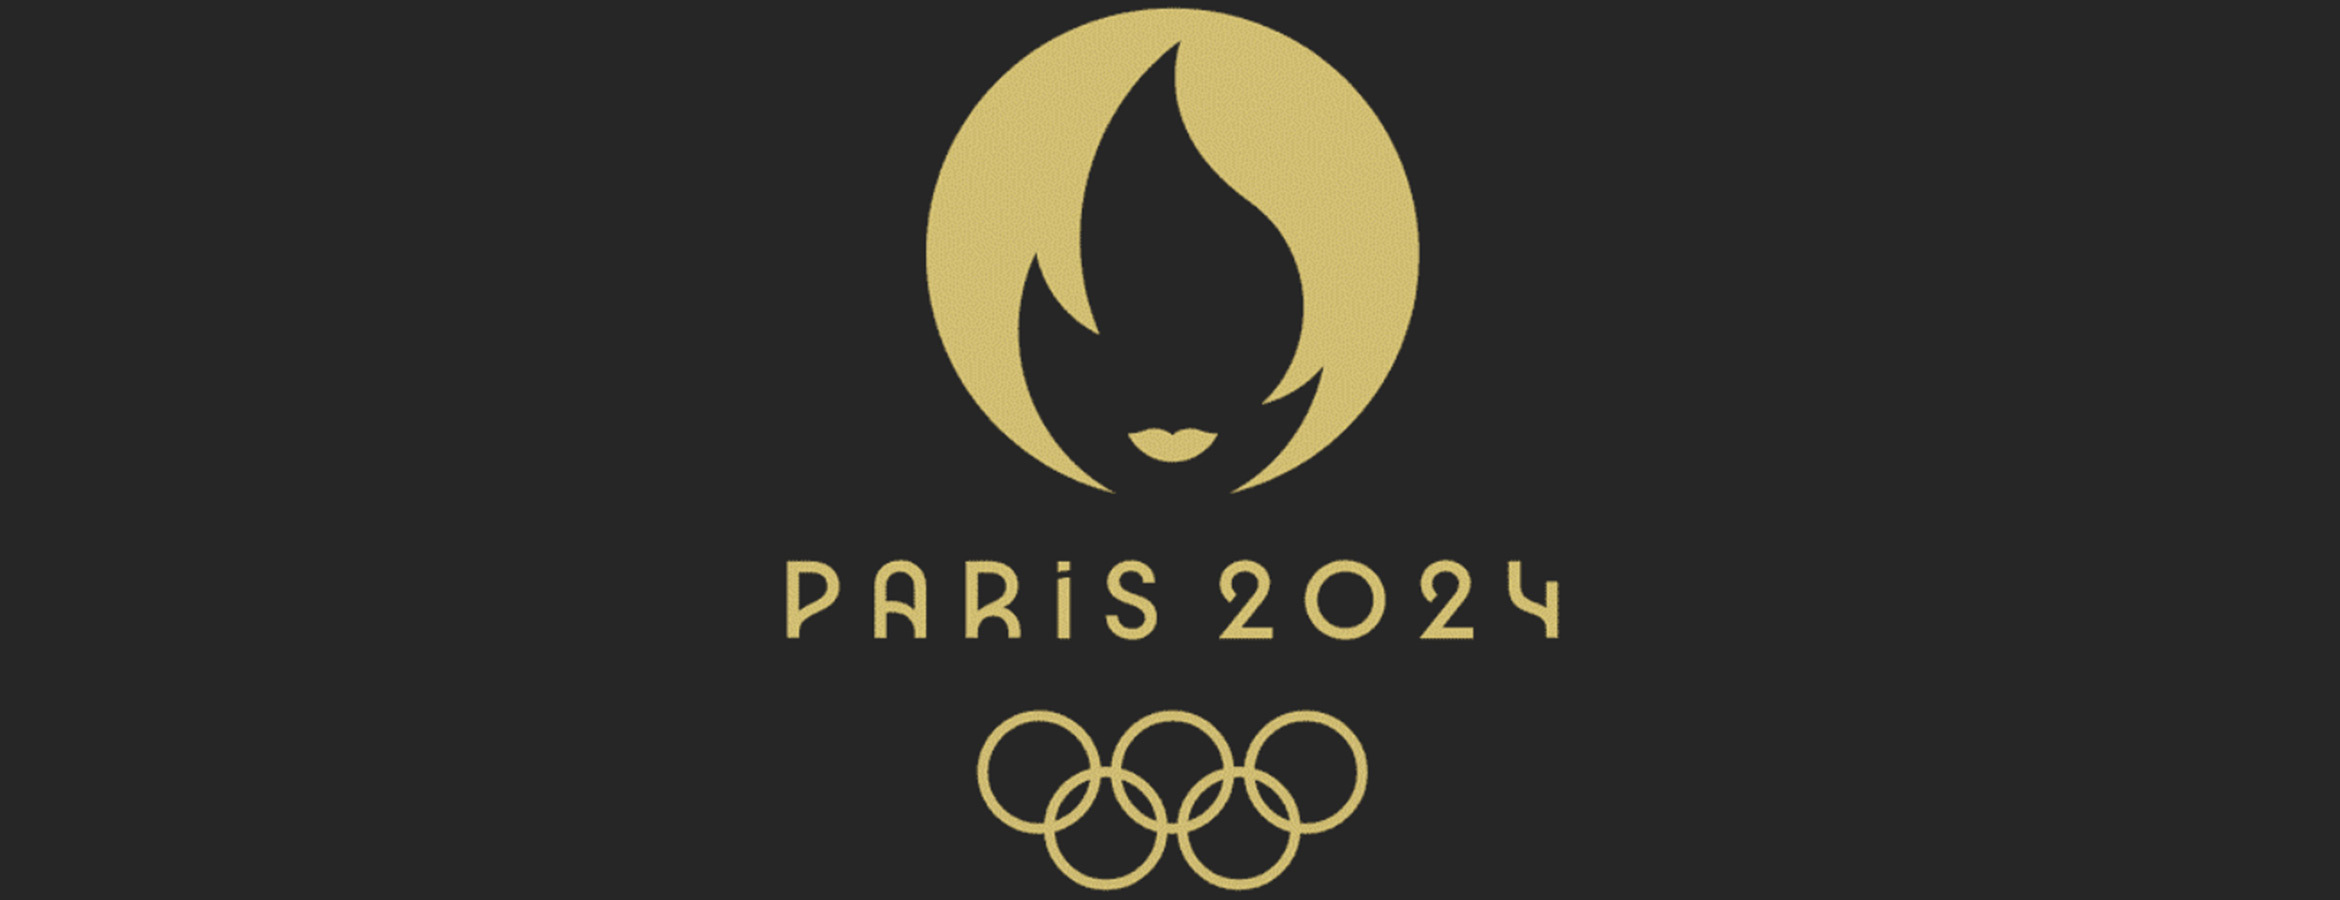

Dans cette troisième et dernière partie, l’accent est mis sur la modélisation et la prédiction de de performances sportives en vue des Jeux Olympiques de 2024 à Paris. A l’aide de la méthode dite de "Web Scraping", la finalité recherchée est ici de trouver une éventuelle corrélation entre l’investissement dans de nouvelles infrastructures sportives et les résultats des athlètes français aux derniers JO du XXIème siècle pour pronostiquer les possibles performances de certains athlètes français aux prochains Jeux Olympiques.
Lien Web Scraping: France aux Jeux olympiques — Wikipédia (wikipedia.org)

BUT: Trouver une éventuelle corrélation (i.e. régression linéaire) entre l’investissement dans de nouvelles infrastructures sportives et les résultats des athlètes français aux derniers JO du XXIème siècle (prendre en compte la date de création des infrastructures (CF. doc Excel pour variable « EquAnneeService »)

Reprenons notre bas de données originelle, à savoir **equipements**.

In [47]:
equipements.head()

,DepCode,DepLib,ComInsee,ComLib,InsNumeroInstall,InsNom,EquipementId,EquNom,EquipementTypeCode,EquipementTypeLib,...,EquUtilClub,EquUtilAutre,EquUtilIndividuel,EquUtilPerformance,EquUtilFormation,EquUtilRecreation,EquDateDernierTravauxReal,EquDateDernierTravauxAucun,EquGPSX,EquGPSY
0,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E001I010010003,SALLE POLYVALENTE,2201,Salles polyvalentes / des fêtes / non spéciali...,...,1,1,1,0,0,1,NaN,1.0,"4,9206","46,1531"
1,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E002I010010003,BOULODROME COUVERT 8 JEUX,201,Terrain de boules,...,1,0,0,0,0,1,NaN,1.0,"4,9206","46,1531"
2,01,Ain,01001,Abergement-Clémenciat,I010010003,Salle Polyvalente - Boulodromes,E003I010010003,BOULODROME EXTERIEUR,201,Terrain de boules,...,1,0,1,0,0,1,NaN,1.0,"4,9206","46,1531"
3,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E001I010010004,Terrain de Foot de Proximité,2802,Terrain de football,...,0,0,1,0,0,1,NaN,1.0,"4,9247","46,1511"
4,01,Ain,01001,Abergement-Clémenciat,I010010004,Espace Multi-Activites,E002I010010004,AGORESPACE,1701,Plateau EPS/Multisports/city-stades,...,0,0,1,0,0,1,NaN,1.0,"4,9242","46,1508"


In [ ]:
dates = [i for i in range(1900,2028,4)]
Nombre_Investissements = np.zeros(len(dates))
investissement = pd.DataFrame(
    {'Nombre_Investissements' : Nombre_Investissements,
    },
    index = dates
    )

for year in dates :
    for i in range(0, len(equipements.index)):
        if year <= equipements.at[i,'EquAnneeService'] < year+4 :
            investissement.at[year,'Nombre_Investissements'] += 1
        elif year <= equipements.at[i,'EquDateDernierTravauxReal'] < year+4 :
            investissement.at[year,'Nombre_Investissements'] += 1
investissement.head()

,Nombre_Investissements
1900,184.0
1904,298.0
1908,202.0
1912,144.0
1916,50.0


In [53]:
investissement.tail(15)

,Nombre_Investissements
1968,16062.0
1972,20796.0
1976,19248.0
1980,34010.0
1984,34554.0
1988,37388.0
1992,38116.0
1996,37338.0
2000,69674.0
2004,75462.0


In [51]:
investissement.describe()

,Nombre_Investissements
count,32.00000
mean,16742.31250
std,22545.61604
min,0.00000
25%,454.00000
50%,2320.00000
75%,34146.00000
max,75462.00000


In [54]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/France_aux_Jeux_olympiques"
    
request_text = request.urlopen(url_ligue_1).read()
# print(request_text[:1000])    

In [55]:
page = bs4.BeautifulSoup(request_text, "html.parser")

In [ ]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find('table', {'class' : 'wikitable sortable'})
print(tableau_participants)

In [57]:
table_body = tableau_participants.find('tbody')
rows = table_body.find_all('tr')

In [58]:
cols = rows[1].find_all('td')
print(cols[0])
print(cols[0].text.strip())

<td align="left"><span class="flagicon" data-sort-value=""><a class="image" href="/wiki/Fichier:Flag_of_Greece_(1822-1978).svg" title="Drapeau de la Grèce"><img alt="Drapeau de la Grèce" class="noviewer thumbborder" data-file-height="800" data-file-width="1200" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Flag_of_Greece_%281822-1978%29.svg/20px-Flag_of_Greece_%281822-1978%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Flag_of_Greece_%281822-1978%29.svg/30px-Flag_of_Greece_%281822-1978%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6e/Flag_of_Greece_%281822-1978%29.svg/40px-Flag_of_Greece_%281822-1978%29.svg.png 2x" width="20"/></a></span> <b><a href="/wiki/France_aux_Jeux_olympiques_de_1896" title="France aux Jeux olympiques de 1896">1896 Athènes</a></b></td>
1896 Athènes


In [59]:
for ele in cols : 
    print(ele.text.strip())


1896 Athènes
5
4
2
11
4
4


In [ ]:
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_participants[cols[0]] = cols[1:]
dico_participants

In [61]:
data_participants = pd.DataFrame.from_dict(dico_participants,orient='index')
data_participants.head()

,0,1,2,3,4,5
1896 Athènes,5,4,2,11,4,4
1900 Paris,27,41,34,102,1,1
1904 St. Louis,0,1,0,1,–,11
1908 Londres,5,5,9,19,4,4
1912 Stockholm,7,4,3,14,5,6


In [62]:
titres_colonnes = ['Médailles or', 'Médailles argent', 'Médailles bronze', 'Médailles', 'Rang médailles or', 'Rang médailles']
data_participants.columns = titres_colonnes
data_participants.head()

,Médailles or,Médailles argent,Médailles bronze,Médailles,Rang médailles or,Rang médailles
1896 Athènes,5,4,2,11,4,4
1900 Paris,27,41,34,102,1,1
1904 St. Louis,0,1,0,1,–,11
1908 Londres,5,5,9,19,4,4
1912 Stockholm,7,4,3,14,5,6


In [68]:
data_participants['Date'] = data_participants.index
data_participants['Date'] = data_participants['Date'].apply(lambda x: int(x.split(sep=None)[0]))
data_participants.set_index('Date',inplace=True)
data_participants.head()

,Médailles or,Médailles argent,Médailles bronze,Médailles,Rang médailles or,Rang médailles
Date,,,,,,
1896,5,4,2,11,4,4
1900,27,41,34,102,1,1
1904,0,1,0,1,–,11
1908,5,5,9,19,4,4
1912,7,4,3,14,5,6


In [204]:
data_base_2 = pd.concat([investissement,data_participants], join='outer', axis=1)
data_base_2.sample(10, replace=False)

,Nombre_Investissements,Médailles or,Médailles argent,Médailles bronze,Médailles,Rang médailles or,Rang médailles
1984,34554.0,5,7,16,28,12,9
1896,NaN,5,4,2,11,4,4
2028,NaN,Jeux à venir,None,None,None,None,None
2000,69674.0,13,14,11,38,6,6
2004,75462.0,11,9,13,33,7,7
1952,2230.0,6,6,6,18,7,8
1920,572.0,9,19,13,41,8,4
1972,20796.0,2,4,7,13,17,14
1932,888.0,10,5,4,19,3,6
1904,298.0,0,1,0,1,–,11


In [205]:
data_base_2['Investissements_JO'] = np.zeros(len(data_base_2.index))

for i in range(3,len(data_base_2.index)):
    data_base_2.iat[i,7]= data_base_2.iat[i-3,0] + data_base_2.iat[i-2,0]

data_base_2.head(10)                                                                                

,Nombre_Investissements,Médailles or,Médailles argent,Médailles bronze,Médailles,Rang médailles or,Rang médailles,Investissements_JO
1900,184.0,27,41,34,102,1,1,0.0
1904,298.0,0,1,0,1,–,11,0.0
1908,202.0,5,5,9,19,4,4,0.0
1912,144.0,7,4,3,14,5,6,482.0
1916,50.0,NaN,NaN,NaN,NaN,NaN,NaN,500.0
1920,572.0,9,19,13,41,8,4,346.0
1924,412.0,13,15,10,38,3,2,194.0
1928,752.0,6,10,5,21,7,5,622.0
1932,888.0,10,5,4,19,3,6,984.0
1936,868.0,7,6,6,19,5,5,1164.0


In [206]:
data_base_2bis = data_base_2.copy()
data_base_2bis = data_base_2bis.dropna()
data_base_2bis['Médailles'] = data_base_2bis['Médailles'].apply(lambda x: int(x))
data_base_2bis = data_base_2bis.drop(labels = [1900,1904,1908,1912,2020], axis=0)

In [208]:
data_base_2bis.tail(5)                                                                                

,Nombre_Investissements,Médailles or,Médailles argent,Médailles bronze,Médailles,Rang médailles or,Rang médailles,Investissements_JO
2000,69674.0,13,14,11,38,6,6,75504.0
2004,75462.0,11,9,13,33,7,7,75454.0
2008,61788.0,7,16,20,43,10,6,107012.0
2012,48600.0,11,11,13,35,7,7,145136.0
2016,14402.0,10,18,14,42,7,6,137250.0


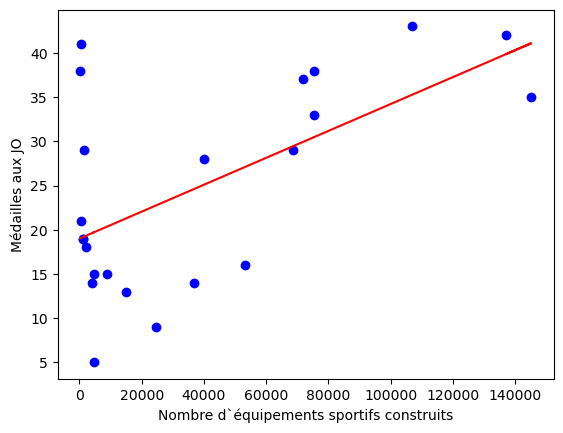

In [209]:
x = data_base_2bis[["Investissements_JO"]]
y = data_base_2bis[["Médailles"]]
model = LinearRegression(fit_intercept=True).fit(x,y) # Fit_intercept = False pour que la courbe passe par (0,0)

plt.scatter(x, y, color = 'blue')
plt.plot(x, model.predict(x), color = 'red')
plt.xlabel('Nombre d`équipements sportifs construits')
plt.ylabel('Médailles aux JO')
plt.show()

In [210]:
x = sm.add_constant(x)
model = OLS(y,x)
results = model.fit()
su = results.summary()
su

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Médailles   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     11.38
Date:                Wed, 21 Dec 2022   Prob (F-statistic):            0.00287
Time:                        11:22:10   Log-Likelihood:                -83.731
No. Observations:                  23   AIC:                             171.5
Df Residuals:                      21   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 19.0127      2.649      7.176      0.000      13.503      24.523
Investissements_JO     0.0002   4.51e-05      3.373      0.003    5.83e-05       0.000
==============================================================================
Omnibus:                        1.937   Durbin-Watson:                   0.836
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.181
Skew:                           0.555   Prob(JB):                        0.554
Kurtosis:                       2.994   Cond. No.                     7.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Désormais, essayons de voir si ce modèle semble correct pour déterminer le nombre de médailles que la France est amenée à obtenir aux prochains Jeux Olympiques. Tout d'abord, testons pour 2020.

Pour cela, utilisons la droite de régression obtenue précédemment avec les investissements sportifs pour les JO de 2020.

In [217]:
prediction_2020 = results.params[0] + results.params[1]*data_base_2.at[2020,'Investissements_JO']
réalité_2020 = data_base_2.at[2020,'Médailles']
print("Prévision de médailles :", prediction_2020)
print("Médailles obtenues :", réalité_2020)

Prévision de médailles : 35.80359516646115
Médailles obtenues : 33


Ainsi, ce modèle que nous avons construit prédisait 36 médailles pour les Jeux Olympiques. La France en a finalement obtenu 33.

Pour 2024, la France obtiendrait ainsi :

In [219]:
prediction_2024 = results.params[0] + results.params[1]*data_base_2.at[2024,'Investissements_JO']
print("Prévision de médailles :", prediction_2024)

Prévision de médailles : 28.595801461557606


Le modèle prévoit donc 29 médailles pour la France en 2024.

Cependant, le modèle apparaît comme très limité et ce, pour plusieurs raisons :
- le peu de données disponibles pour construire le modèle (moins de 30)
- des données de test qui sont très hétérogènes et pas forcément utiles (les JO n'ont plus rien à voir avec ce qu'ils étaient il y a 100 ans)
- des données qui semblent incomplètes entre 2016 et 2020 tant le nombre d'investissements entre 2016 et 2020 paraît faible comparé aux années précédentes
- de nombreux facteurs ne sont pas pris en compte (forme du moment, Jeux Olympiques à domicile donc motivation accrue, blessures, résultats récents...)
- la variable explicative n'est pas très pertinente (montant des investissements, secteur...)

Toutes ces raisons nous poussent à prendre notre modèle avec des pincettes et à douter des résultats annoncés.

## **Conclusion:**

Tout au long de ce projet, nous avons eu recours à divers méthodes (sélection et nettoyage des données, data visualisation, web scraping, modélisations et analyses prédictives par régression linéaire) pour être en mesure de répondre à la problématique initialement posée, à savoir si la répartition des infrastructures sportives sur le territoire français a un quelconque impact sur la pratique du sport de haut niveau à l’échelle départementale. Il semblerait que l’on puisse désormais raisonnablement répondre que cela soit le cas, en évitant toutefois de rentrer dans des considérations approximatives dans la mesure où nous nous avons fait le choix de nous attarder sur certaines variables plutôt que d’autres, et qu’il y a par conséquent un biais qui apparaît *de facto*.
La dernière partie permet de rajouter à notre projet une touche d’originalité et montre que notre projet s’inscrit dans l’actualité sportive en vue des prochains Jeux Olympiques. En effet, selon une étude de 2020 menée par l’Union Sport & Cycle, le développement des nouveaux équipements sportifs de proximité fait l’objet d’un soutien de l’Etat à hauteur de 10 millions d’euros annoncé en 2017. Dans le cadre de la candidature de Paris aux Jeux Olympiques et Paralympiques 2024, ces 10 millions d’euros serviront à financer, au côté des collectivités, de nouvelles infrastructures sportives de proximité. Ces participations de financement étatique semblent avoir fait leurs preuves sur le long terme; il reste désormais à savoir si ce nouvel investissement de la part du gouvernement se concrétisera par des résultats sportifs à la hauteur des attentes en 2024.

Alors pour savoir si nos prédictions sont justes (même si nous espérons que la France obtiendra plus de médailles que prévu), nous vous donnons rendez-vous en 2024 !